In [1]:
# based on <https://github.com/leelabcnbc/thesis-yimeng-v1/blob/master/results_ipynb/yuanyuan_8k_a_3day/transfer_learning_factorized_vgg.ipynb>

In [2]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training_extra.transfer_learning.meta import fetch_meta
from thesis_v2.training_extra.transfer_learning.analysis import collect_one_setting

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/transfer_learning_factorized_vgg'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator, sparse_list, feature_file_name
from key_utils import keygen

num_sparse = len(sparse_list)

In [5]:
def load_everything():
    _df_collect = []
    argmax_all = []
    for idx, param in enumerate(param_iterator(include_sparse=False)):
        if idx % 5 == 0:
            print(idx)
        
        assert param['split_seed'] == 'legacy' and param['model_seed'] == 0
        
        # get meta
        with h5py.File(feature_file_name, 'r') as f_feature:
            meta_this = fetch_meta(f_feature['a/' + param['suffix']], 'a/' + param['suffix'])
        assert meta_this['dataset'] == 'a'
        assert meta_this['layer_unroll'] == 0
        
        performance_result = collect_one_setting(
            sparse_list = sparse_list,
            keygen=keygen,
            param=param,
            num_neuron=79,
        )
       
        _df_collect.append({
            'network': meta_this['network'],
            'scale,loss,act': f"{meta_this['setting']},{param['loss_type']},{param['act_fn']}",
            'layer': '{:02d}.{}'.format(meta_this['layer_idx'], meta_this['layer_name']),
            'corr_test': performance_result['test_best'].mean(),
        })
        
        # which sparsity setting is used.
        argmax_all.append(performance_result['argmax'])
        
    argmax_all = np.concatenate(argmax_all, axis=0)
    # looks good. most neurons select middle ones.
    
    # remove -1 ones.
    argmax_all = argmax_all[argmax_all!=-1]
    print(np.bincount(argmax_all)/argmax_all.size)

    _df =  pd.DataFrame(_df_collect, columns=['network', 'scale,loss,act', 'layer', 'corr_test'])
    _df = _df.set_index(['network', 'scale,loss,act', 'layer'], verify_integrity=True)
    return _df

In [6]:
df = load_everything()

['vgg11/half/1.0', 'vgg11/half/2.0', 'vgg11/half/3.0', 'vgg11/half/4.0', 'vgg11/half/5.0', 'vgg11/half/6.0', 'vgg11/quarter/1.0', 'vgg11/quarter/2.0', 'vgg11/quarter/3.0', 'vgg11/quarter/4.0', 'vgg11/quarter/5.0', 'vgg11/quarter/6.0', 'vgg11_bn/half/1.0', 'vgg11_bn/half/2.0', 'vgg11_bn/half/3.0', 'vgg11_bn/half/4.0', 'vgg11_bn/half/5.0', 'vgg11_bn/half/6.0', 'vgg11_bn/quarter/1.0', 'vgg11_bn/quarter/2.0', 'vgg11_bn/quarter/3.0', 'vgg11_bn/quarter/4.0', 'vgg11_bn/quarter/5.0', 'vgg11_bn/quarter/6.0', 'vgg16/half/2.0', 'vgg16/half/3.0', 'vgg16/half/4.0', 'vgg16/half/5.0', 'vgg16/half/6.0', 'vgg16/half/7.0', 'vgg16/half/8.0', 'vgg16/half/9.0', 'vgg16/quarter/2.0', 'vgg16/quarter/3.0', 'vgg16/quarter/4.0', 'vgg16/quarter/5.0', 'vgg16/quarter/6.0', 'vgg16/quarter/7.0', 'vgg16/quarter/8.0', 'vgg16/quarter/9.0', 'vgg16_bn/half/2.0', 'vgg16_bn/half/3.0', 'vgg16_bn/half/4.0', 'vgg16_bn/half/5.0', 'vgg16_bn/half/6.0', 'vgg16_bn/half/7.0', 'vgg16_bn/half/8.0', 'vgg16_bn/half/9.0', 'vgg16_bn/quart

In [7]:
df
# results match old file.

corr_test
network  scale,loss,act           layer                
vgg11    half,poisson,softplus    01.pool1     0.487056
         half,mse,softplus        01.pool1     0.486747
         half,poisson,relu        01.pool1     0.495672
         half,mse,relu            01.pool1     0.499613
         half,poisson,softplus    02.conv2_1        NaN
         half,mse,softplus        02.conv2_1        NaN
         half,poisson,relu        02.conv2_1   0.547048
         half,mse,relu            02.conv2_1   0.549416
         half,poisson,softplus    03.pool2     0.550874
         half,mse,softplus        03.pool2     0.548774
         half,poisson,relu        03.pool2     0.551418
         half,mse,relu            03.pool2     0.552948
         half,poisson,softplus    04.conv3_1   0.559793
         half,mse,softplus        04.conv3_1   0.558721
         half,poisson,relu        04.conv3_1   0.554440
         half,mse,relu            04.conv3_1   0.556666
         half,poisson,softplus    05.conv3_2   0.546895
         half,mse,softplus        05.conv3_2   0.545067
         half,poisson,relu        05.conv3_2   0.537460
         half,mse,relu            05.conv3_2   0.540512
         half,poisson,softplus    06.pool3     0.537138
         half,mse,softplus        06.pool3     0.536402
         half,poisson,relu        06.pool3     0.531764
         half,mse,relu            06.pool3     0.535140
         quarter,poisson,softplus 01.pool1     0.491367
         quarter,mse,softplus     01.pool1     0.489221
         quarter,poisson,relu     01.pool1     0.496453
         quarter,mse,relu         01.pool1     0.500102
         quarter,poisson,softplus 02.conv2_1   0.521204
         quarter,mse,softplus     02.conv2_1   0.520795
         quarter,poisson,relu     02.conv2_1   0.519370
         quarter,mse,relu         02.conv2_1   0.521722
         quarter,poisson,softplus 03.pool2     0.515791
         quarter,mse,softplus     03.pool2     0.515407
         quarter,poisson,relu     03.pool2     0.515503
         quarter,mse,relu         03.pool2     0.518430
         quarter,poisson,softplus 04.conv3_1   0.509031
         quarter,mse,softplus     04.conv3_1   0.508399
         quarter,poisson,relu     04.conv3_1   0.500894
         quarter,mse,relu         04.conv3_1   0.505672
         quarter,poisson,softplus 05.conv3_2   0.480944
         quarter,mse,softplus     05.conv3_2   0.480686
         quarter,poisson,relu     05.conv3_2   0.473115
         quarter,mse,relu         05.conv3_2   0.477790
         quarter,poisson,softplus 06.pool3     0.453635
         quarter,mse,softplus     06.pool3     0.452101
         quarter,poisson,relu     06.pool3     0.447102
         quarter,mse,relu         06.pool3     0.449822
vgg11_bn half,poisson,softplus    01.pool1     0.480526
         half,mse,softplus        01.pool1     0.479741
         half,poisson,relu        01.pool1     0.487949
         half,mse,relu            01.pool1     0.491950
         half,poisson,softplus    02.conv2_1   0.555827
         half,mse,softplus        02.conv2_1   0.554157
         half,poisson,relu        02.conv2_1   0.546180
         half,mse,relu            02.conv2_1        NaN
         half,poisson,softplus    03.pool2     0.556711
         half,mse,softplus        03.pool2     0.556281
         half,poisson,relu        03.pool2     0.552297
         half,mse,relu            03.pool2     0.555376
         half,poisson,softplus    04.conv3_1   0.561210
         half,mse,softplus        04.conv3_1   0.560477
         half,poisson,relu        04.conv3_1   0.551201
         half,mse,relu            04.conv3_1   0.555222
         half,poisson,softplus    05.conv3_2   0.548151
         half,mse,softplus        05.conv3_2   0.548001
         half,poisson,relu        05.conv3_2   0.537043
         half,mse,relu            05.conv3_2   0.540680
         half,poisson,softplus    06.pool3     0.540125
         half,mse,softplus        06.pool3     0.538920
         half,

In [8]:
# for loop visualize every thing.

def visualize():
    df_corr_only = df['corr_test']
    for net in df_corr_only.index.get_level_values('network').unique():
        print(net)
        plt.close('all')
        df_this = df_corr_only.xs(net, level='network')
        df_this.unstack('scale,loss,act').sort_index().plot(rot=45)
        plt.show()

vgg11


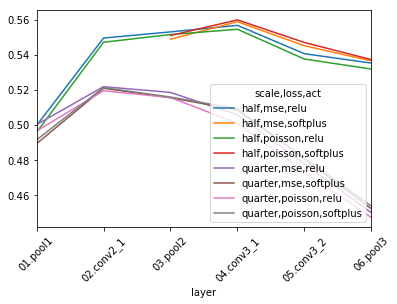

vgg11_bn


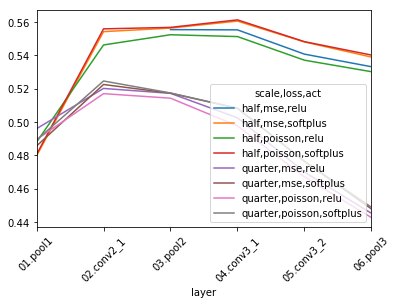

vgg16


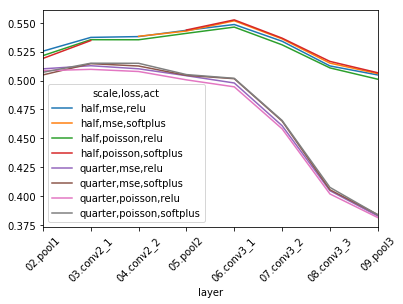

vgg16_bn


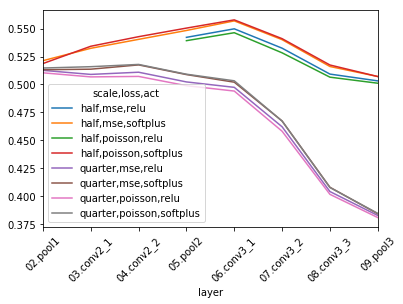

In [9]:
visualize()
# based on these incomplete results, seems that ReLU does not work as good as Softplus for transfer learning.
# This is in contrast to 